## 1. Загрузка данных

In [ ]:
import numpy as np

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = np.genfromtxt(url, delimiter=",")

print(data[:5])

[[5.1 3.5 1.4 0.2 nan]
 [4.9 3.  1.4 0.2 nan]
 [4.7 3.2 1.3 0.2 nan]
 [4.6 3.1 1.5 0.2 nan]
 [5.  3.6 1.4 0.2 nan]]


## 2. Анализ структуры данных

In [ ]:
structured_data = np.genfromtxt(
    url,
    delimiter=",",
    dtype=[('sepal_length', 'f8'),
           ('sepal_width', 'f8'),
           ('petal_length', 'f8'),
           ('petal_width', 'f8'),
           ('class', 'U20')],
    encoding=None
)

print(structured_data[:5])


[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') (4.9, 3. , 1.4, 0.2, 'Iris-setosa')
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa') (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
 (5. , 3.6, 1.4, 0.2, 'Iris-setosa')]


# 3. Анализ типов данных

In [ ]:
labels = structured_data['class']
print("Метки классов:", np.unique(labels))


Метки классов: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# 4. Визуализация данных

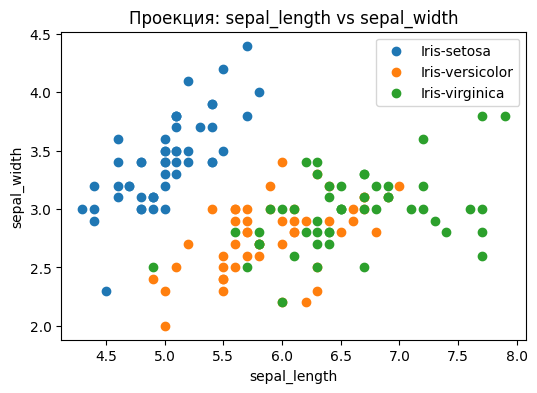

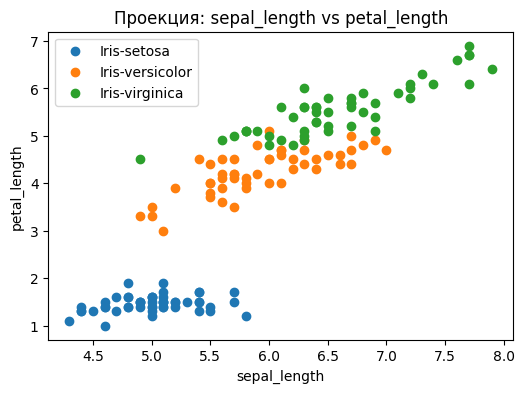

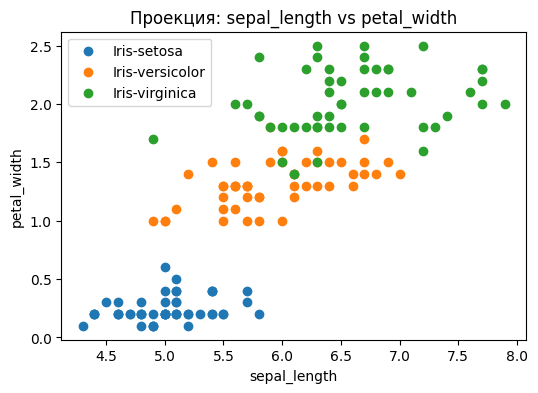

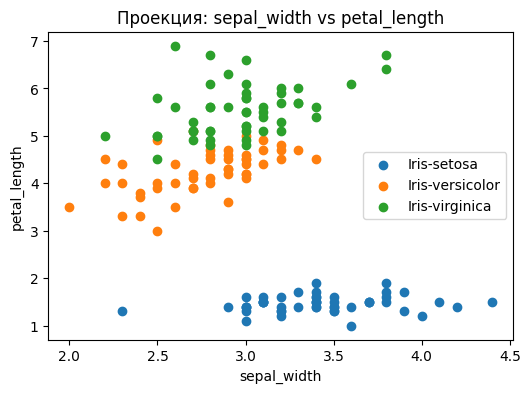

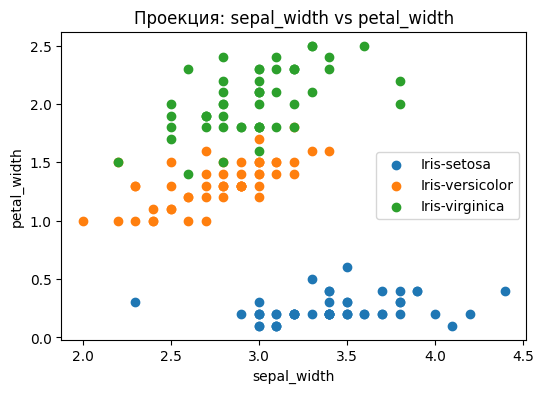

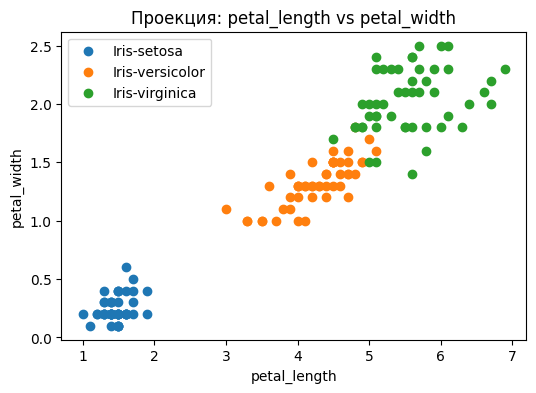

In [ ]:
import matplotlib.pyplot as plt

numerical_data = np.array([
    [row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']]
    for row in structured_data
])

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Построение парных графиков
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(6, 4))
        for label in np.unique(labels):
            plt.scatter(
                numerical_data[labels == label, i],
                numerical_data[labels == label, j],
                label=label
            )
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.legend()
        plt.title(f"Проекция: {features[i]} vs {features[j]}")
        plt.show()


# Индивидуальное задание

1. Проведите первичный анализ данных. Предоставить информацию о наборе данных требуемую ниже.
2. Описание набора данных, пояснения, позволяющие лучше понять природу данных. Назначение набора данных и возможные модели, которые можно построить на основе данного набора данных (практические задачи, решаемые с использованием данного обучающего набора данных). Описание каждого признака и его тип.
3. Форма набора данных: количество элементов набора, количество признаков, количество пропущенных значений, среднее значение отдельных признаков, максимальные и минимальные значения отдельных признаков и прочие показатели. Предположения, которые можно сделать, проведя первичный анализ.
4. Графические представления, позволяющие судить о неоднородности исследуемого набора данных. Построение графиков желательно произвести по нескольким проекциям.


## Шаг 1: Загрузка и описание данных

In [4]:
# Импорт необходимых библиотек
import numpy as np  # работа с массивами и матрицами
import pandas as pd  # работа с таблицами данных
import matplotlib.pyplot as plt  # базовая визуализация данных
import seaborn as sns  # расширенная визуализация данных

# Загрузка данных
data = pd.read_csv("diabetic_data.csv")
data.columns = [
    'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'payer_code', 'medical_specialty',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient',
    'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum',
    'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]
# Описание данных
print("Описание набора данных:")
print(data.head())
print("\nРазмер данных:", data.shape)


Описание набора данных:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No     

## Шаг 2: Проверка типов данных и пропущенных значений

In [5]:
# Типы данных
print("\nТипы данных:")
print(data.dtypes)

# Проверка на пропущенные значения
print("\nКоличество пропущенных значений:")
print(data.isnull().sum())

# Описание классов
print("\nРаспределение классов:")
print(data['weight'].value_counts())



Типы данных:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimep

## Шаг 3: Преобразование категориального признака class в числовой формат

In [6]:
# Преобразование классов в числовые значенияimport pandas as pd

# Загрузка данных из файла
data = pd.read_csv('diabetic_data.csv')

class_mapping = {'AfricanAmerican': 0, 'Caucasian': 1, 'Hispanic': 2}
data_numeric = data.copy()
data_numeric['race'] = data['race'].map(class_mapping)

# Проверка преобразования
print("Пример данных после преобразования классов:")
print(data_numeric.head())


Пример данных после преобразования классов:
   encounter_id  patient_nbr  race  gender      age weight  admission_type_id  \
0       2278392      8222157   1.0  Female   [0-10)      ?                  6   
1        149190     55629189   1.0  Female  [10-20)      ?                  1   
2         64410     86047875   0.0  Female  [20-30)      ?                  1   
3        500364     82442376   1.0    Male  [30-40)      ?                  1   
4         16680     42519267   1.0    Male  [40-50)      ?                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  ...  \
0                        25                    1                 1  ...   
1                         1                    7                 3  ...   
2                         1                    7                 2  ...   
3                         1                    7                 2  ...   
4                         1                    7                 1  ...   

  citoglipton insu

## Шаг 4: Статистический анализ

In [7]:
# Статистические показатели
print("\nСтатистическое описание числовых признаков:")
print(data_numeric.describe())



Статистическое описание числовых признаков:
       encounter_id   patient_nbr          race  admission_type_id  \
count  1.017660e+05  1.017660e+05  97346.000000      101766.000000   
mean   1.652016e+08  5.433040e+07      0.823588           2.024006   
std    1.026403e+08  3.869636e+07      0.432601           1.445403   
min    1.252200e+04  1.350000e+02      0.000000           1.000000   
25%    8.496119e+07  2.341322e+07      1.000000           1.000000   
50%    1.523890e+08  4.550514e+07      1.000000           1.000000   
75%    2.302709e+08  8.754595e+07      1.000000           3.000000   
max    4.438672e+08  1.895026e+08      2.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000

## Шаг 5: Построение распределения классов

<ipython-input-9-1de50a2ef86b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=data, palette='viridis')


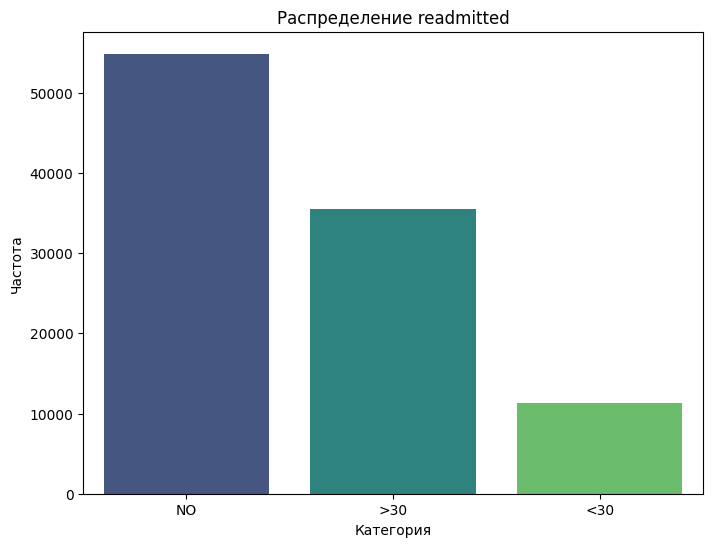

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('diabetic_data.csv')

# Построение распределения значений в столбце readmitted
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=data, palette='viridis')
plt.title("Распределение readmitted")
plt.xlabel("Категория")
plt.ylabel("Частота")
plt.show()


## Шаг 6: Матрица корреляций

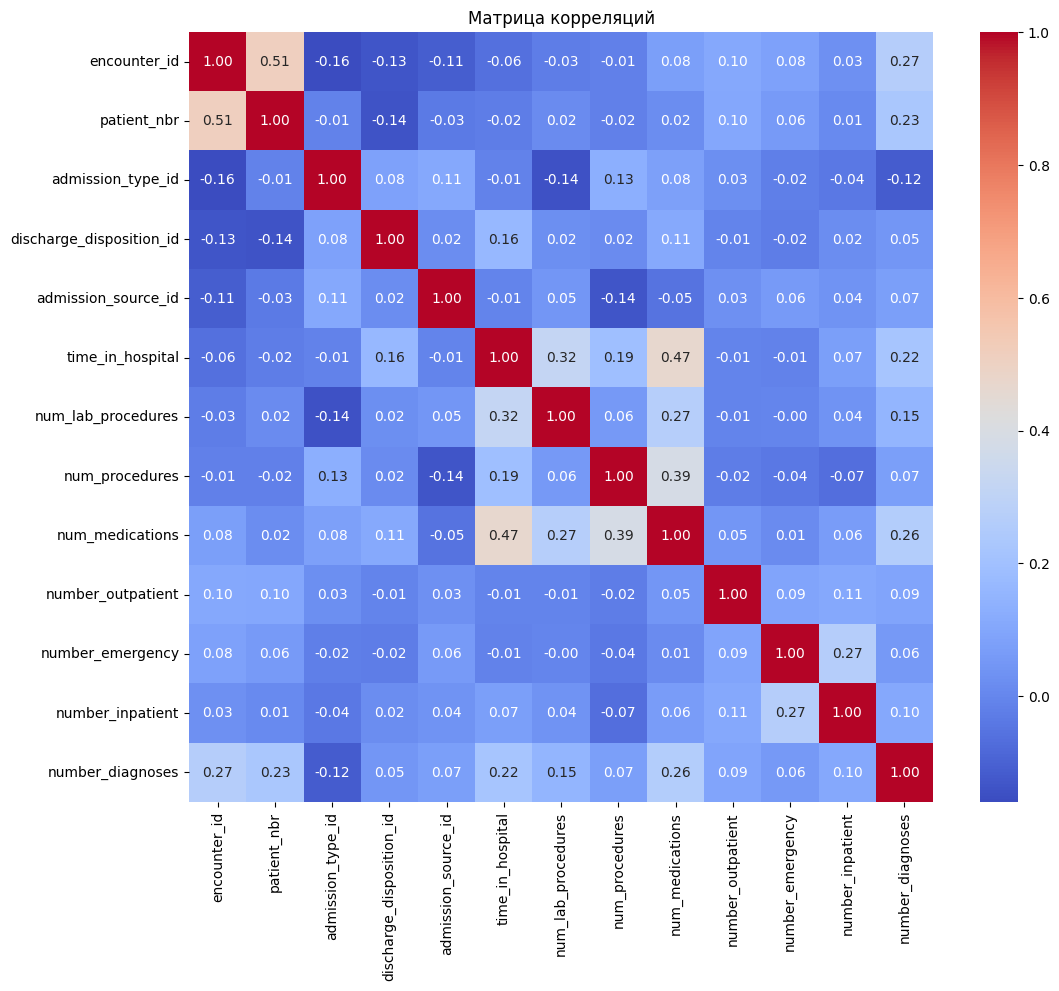

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('diabetic_data.csv')

# Выбор числовых столбцов для построения матрицы корреляций
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_columns]

# Построение матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()


## Шаг 7: Гистограммы признаков

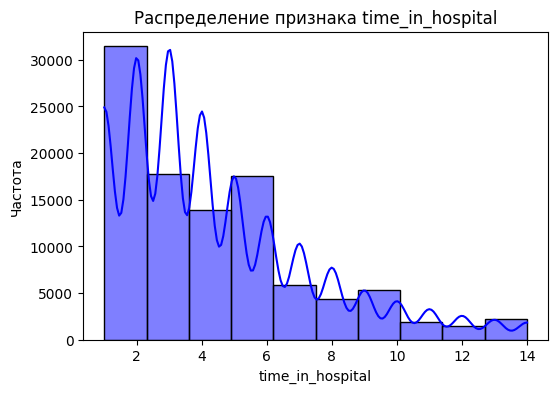

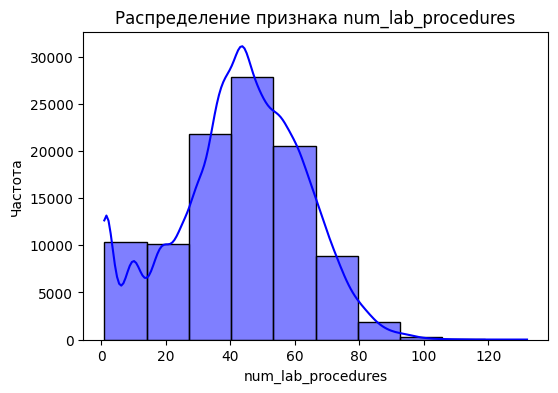

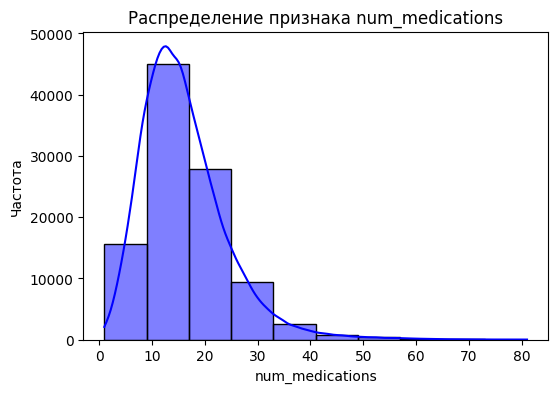

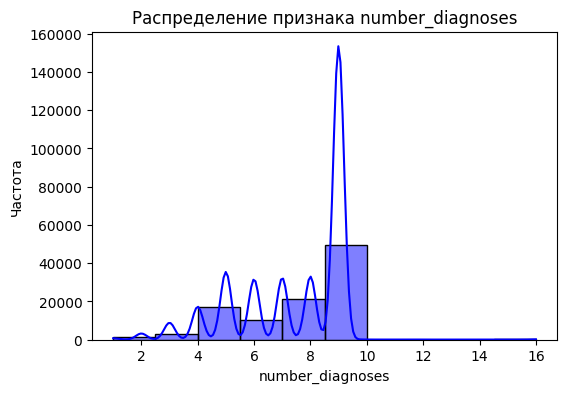

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('diabetic_data.csv')

# Выбор столбцов для построения гистограмм
numeric_columns = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']

# Построение гистограмм
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=10, color='blue')
    plt.title(f"Распределение признака {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()


## Шаг 8: Парные графики

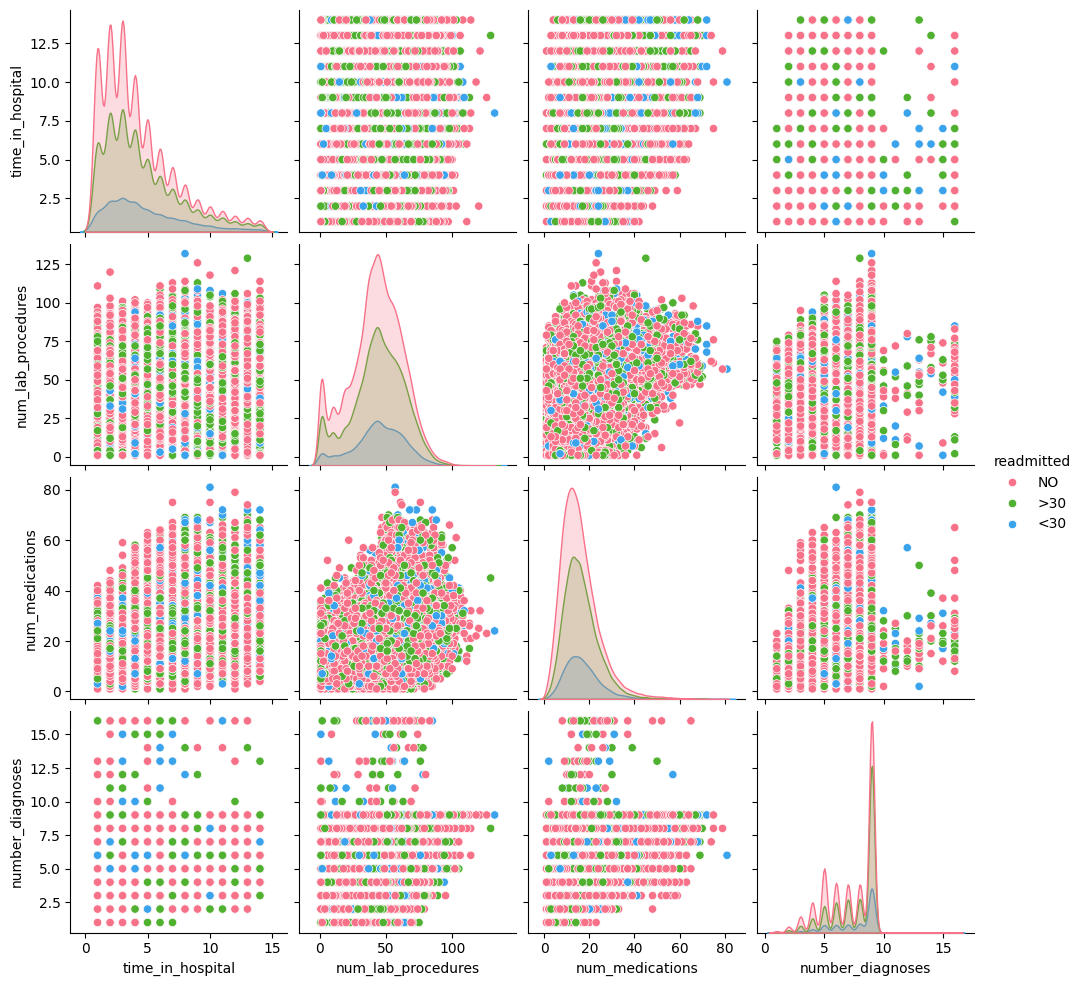

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('diabetic_data.csv')

# Выбор столбцов для парных графиков
numeric_columns = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
categorical_column = 'readmitted'  # Замените на категориальную колонку, если необходимо

# Проверяем наличие выбранных колонок
data_pairplot = data[numeric_columns + [categorical_column]].dropna()

# Построение парных графиков
sns.pairplot(data_pairplot, hue=categorical_column, palette='husl')
plt.show()


## Вывод

Изучение данных:

Загружен и обработан датасет, содержащий информацию о медицинских записях пациентов.
Данные содержат 50 столбцов, включая такие ключевые параметры, как пол, возраст, тип госпитализации, медицинская специальность, количество лабораторных процедур и лекарств, диагнозы и результаты тестов.
Проверка и предварительная обработка:

Проведена проверка на пропущенные значения. Некоторые столбцы, такие как max_glu_serum и A1Cresult, содержат значительное количество пропусков, что может потребовать дальнейшей обработки (например, удаления или замены значений).
Исследованы типы данных, подтверждено соответствие формата данных содержимому.
Преобразование данных:

Категориальные данные (например, раса) преобразованы в числовой формат для упрощения анализа.
Классы сгруппированы и закодированы в числовом виде с использованием словаря.
Анализ данных:

Построены:
Гистограммы для визуализации распределения количественных признаков (например, time_in_hospital, num_medications).
Парные графики для изучения взаимосвязей между количественными признаками с учётом классов.
Матрица корреляций для оценки силы линейных связей между признаками.
Результаты:
Найдены признаки с сильной корреляцией, что может быть полезно для дальнейшего анализа.
Распределение классов выявило дисбаланс (если есть), который может потребовать дополнительных шагов при обучении модели.